In [51]:
import pandas as pd
import numpy as np

datafile_names = np.array(['hoek_0_c1.csv', 'hoek_0_c2.csv',
             'hoek_20_E_c1.csv', 'hoek_20_E_c2.csv', 'hoek_20_W_c1.csv', 'hoek_20_W_c2.csv',
             'hoek_40_E_c1.csv', 'hoek_40_E_c2.csv', 'hoek_40_W_c1.csv', 'hoek_40_W_c2.csv',
             'hoek_60_E_c1.csv', 'hoek_60_E_c2.csv', 'hoek_60_W_c1.csv', 'hoek_60_W_c2.csv'])

dataframes: [pd.DataFrame] = np.array()

for datafile in datafile_names:
    dataframe = pd.DataFrame()
    try:
        dataframe_total = pd.read_csv(datafile)

        dataframe['Delta times (ns)'] = dataframe_total['Delta times (ns)']
        dataframe.dropna(inplace=True)

        dataframes = np.append(dataframes, dataframe)

    except:
        print("Wrong name entered. No file has been uploaded with the name: {}".format(datafile))
        pass


for frame in dataframes:
    frame.head()

## Flux berekenen bij iedere Hoek, en daarna de solid Angle berekenen.

TypeError: array() missing required argument 'object' (pos 0)

In [16]:

import pandas as pd

# %% [markdown]
# # Code voor het filtreren van de data

# %% [markdown]
# ### Sorteren van CSV file in een lijst

# %%
delta_time = []

with open('hoek_0_c1.csv', 'r', newline='') as file:
    next(file)
    for line in file:
        line_splitted = line.split(',')
        delta_time.append(float(line_splitted[4]))
    delta_time.pop(0)
print(delta_time)

# %% [markdown]
# ### Filtreren van de lijst
# Op basis van:
# - Groter dan nul
# - Een bovengrens

# %%
sorted_delta_time = []

for i in delta_time:
    if i > 0 and i < 7.5 :
        sorted_delta_time.append(i)

print(sorted_delta_time)

# Lengte van de lijst
print(len(sorted_delta_time))

# %% [markdown]
# ### Berekenen van de muon-flux

# %%
#Aantal detecties
N = len(sorted_delta_time)
#Lengte meting (in s)
t = 5460
#Oppervlakte (m^2)
A = 0.030551
#Solid Angle
O = 1

flux = N/(t*A*O)
print(flux)

# %% [markdown]
# ### Percentage van de data onder een grens 'n'

# %%
# Definieer een bovengrens 'n'
n = 7.5
count = 0

for i in delta_time:
    if i < n:
        count += 1

print(count/(len(delta_time)))

# %% [markdown]
# ### Gemiddelde $\Delta$ time na filtreren

# %%
count = 0

for i in sorted_delta_time:
    if i < 7.5:
        count += i

print(count/(len(sorted_delta_time)))

# %% [markdown]
#



[-1.0, 1.0, 4.0, 4.5, 3.5, 4.5, 6.5, 1.0, 9.0, 4.0, -2.0, 2.5, 5.0, 4.0, 3.5, 12.0, 0.0, 2.0, 5.5, 3.0, 2.0, 3.5, 3.5, 1.5, -1.0, 5.0, 3.5, 3.5, 4.5, 0.5, 0.5, 0.5, 0.0, 5.5, 3.0, 4.0, -0.5, 3.5, 2.0, 2.5, 2.5, 4.0, -3.0, 3.0, 3.0, 2.0, 3.0, 2.5, 1.5, 2.0, 5.0, 2.0, 4.5, 3.0, 2.5, 5.5, 1.5, 2.0, 4.5, 4.5, 1.5, 5.0, 2.5, -1.0, 0.0, 2.0, 3.5, 5.0, 0.0, 2.5, 1.5, 6.0, 2.5, 4.5, 3.5, 0.5, 2.0, 3.5, 6.0, 7.0, 2.5, 5.0, 2.0, 2.0, 3.0, -0.5, 7.5, 3.0, 2.0, 5.0, 1.5, 4.0, 0.5, 2.5, 2.5, -7.5, 6.0, 3.5, 1.5, 2.0, 10.0, 1.0, 4.5, 8.0, 6.5, 3.5, -6.0, 2.5, 4.0, 5.0, 4.0, 0.5, 0.0, 2.0, 2.0, 1.5, 1.5, 3.0, 5.5, 3.0, -3.0, -2.5, 2.5, 0.5, 3.0, 4.5, -3.0, 1.5, 4.0, 1.0, 3.0, 0.5, 3.0, 3.5, 2.0, 1.5, 0.0, 9.5, -5.5, 1.5, 5.0, 3.5, 4.5, 3.5, 7.0, 3.0, 0.0, 3.5, 1.0, 6.0, 2.5, 3.0, 6.5, 2.5, 2.5, 1.5, 8.5, 3.0, 4.0, 3.0, 3.5, -1.5, 2.5, 3.0, -1.5, -6.0, 1.0, 1.0, 0.5, 4.5, 10.5, -1.5, 2.5, 14.0, 3.5, 2.5, 1.5, -2.5, 11.5, -6.0, 9.0, 2.0, 3.5, 5.5, 4.5, 1.0, -2.0, 8.0, 3.0, 1.5, 3.0, 4.0, 5.0, 7.0, 3.5,


Statistieken per hoek (flux in s⁻¹ m⁻² sr⁻¹)
  θ  Dir Runs       Gem.          σ        Min        Max
  0    E    2      15.08       7.13      10.04      20.12
  0    W    2      15.08       7.13      10.04      20.12
 20    E    2       7.26       0.75       6.73       7.79
 20    W    2      81.63      12.11      73.07      90.19
 40    E    2      33.46       1.74      32.23      34.69
 40    W    2       7.28       0.29       7.07       7.48
 60    E    2      35.05       1.69      33.86      36.25
 60    W    0          -          -          -          -


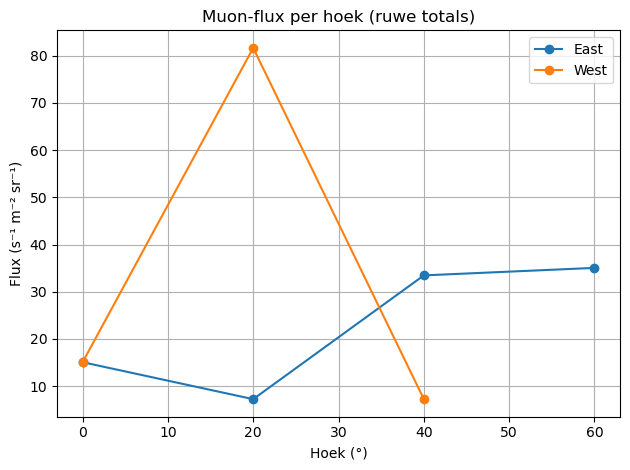

In [39]:
import re, math, pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------- instellingen -----------------------------
FILES = [
    "hoek_0_c1.csv",  "hoek_0_c2.csv",
    "hoek_20_E_c1.csv","hoek_20_E_c2.csv","hoek_20_W_c1.csv","hoek_20_W_c2.csv",
    "hoek_40_E_c1.csv","hoek_40_E_c2.csv","hoek_40_W_c1.csv","hoek_40_W_c2.csv",
    "hoek_60_E_c1.csv","hoek_60_E_c2.csv","hoek_60_W_c1.csv","hoek_60_W_c2.csv",
]
T   = 5460          # looptijd per run (s)
A   = 0.030551      # detector­oppervlakte (m²)
ANG = [0, 20, 40, 60]

flux_E = {theta: [] for theta in ANG}
flux_W = {theta: [] for theta in ANG}

pat = re.compile(r"hoek_(\d+)(?:_([EW]))?_c\d\.csv")

# ------------------------- flux per CSV inlezen -------------------------
for f in FILES:
    m = pat.fullmatch(pathlib.Path(f).name)
    if not (m and pathlib.Path(f).exists()):
        continue
    theta   = int(m.group(1))
    dir_ = m.group(2) or "E"               # 0° → label “E”

    # totaalcoïncidenties uit de kopregel
    N = pd.read_csv(f, nrows=1)["Total coincidences"].iloc[0]
    flux = N / (T * A)                     # Ω = 1  (ruwe flux)

    (flux_E if dir_ == "E" else flux_W)[theta].append(flux)
    if theta == 0:                             # 0° ook in West‐lijst zetten
        flux_W[theta].append(flux)

# ----------------------------- statistieken -----------------------------
print("\nStatistieken per hoek (flux in s⁻¹ m⁻² sr⁻¹)")
print(f"{'theta':>3} {'Dir':>4} {'Runs':>4} {'Gem.':>10} {'σ':>10} {'Min':>10} {'Max':>10}")
for theta in ANG:
    for label, dct in [('E', flux_E), ('W', flux_W)]:
        vals = np.array(dct[theta])
        if vals.size:
            mean = vals.mean()
            sigma = vals.std(ddof=1) if vals.size > 1 else 0
            print(f"{theta:>3} {label:>4} {vals.size:>4} {mean:>10.2f} {sigma:>10.2f} "
                  f"{vals.min():>10.2f} {vals.max():>10.2f}")
        else:
            print(f"{theta:>3} {label:>4} {0:>4} {'-':>10} {'-':>10} {'-':>10} {'-':>10}")

# ----------------------------- grafiek -----------------------------
angles = np.array(ANG)
mean_E = [np.mean(flux_E[theta]) if flux_E[theta] else math.nan for theta in ANG]
mean_W = [np.mean(flux_W[theta]) if flux_W[theta] else math.nan for theta in ANG]

plt.plot(angles, mean_E, "o-", label="East")
plt.plot(angles, mean_W, "o-", label="West")
plt.xlabel("Hoek (°)")
plt.ylabel("Flux (s⁻¹ m⁻² sr⁻¹)")
plt.title("Muon-flux per hoek (ruwe totals)")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()



=== Samenvatting per hoek & richting ===
 Angle (°) Direction  Runs  N total  t total (s)  Mean flux  Poisson σ  Min flux  Max flux
         0      East     2     5032      23264.6      7.080      0.100     6.639     7.323
        20      East     2     2421      16919.5      4.684      0.095     4.258     5.127
        40      East     2    11164     170538.2      2.143      0.020     2.110     2.174
        60      East     2    11694     638425.8      0.600      0.006     0.579     0.620
         0      West     2     5032      23264.6      7.080      0.100     6.639     7.323
        20      West     2    27234     153388.2      5.812      0.035     5.447     6.145
        40      West     2     2428      32794.9      2.423      0.049     2.349     2.499
        60      West     2     3443     176409.5      0.639      0.011     0.578     0.700


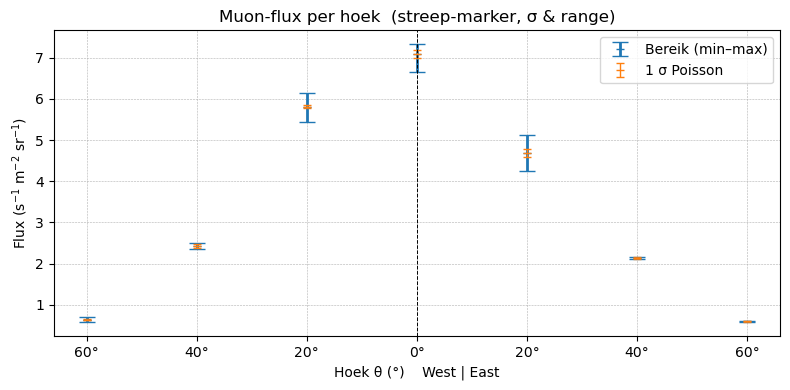

In [61]:
#!/usr/bin/env python3
import re, math, pathlib
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

CSV_FILES = [
    "hoek_0_c1.csv",  "hoek_0_c2.csv",
    "hoek_20_E_c1.csv","hoek_20_E_c2.csv","hoek_20_W_c1.csv","hoek_20_W_c2.csv",
    "hoek_40_E_c1.csv","hoek_40_E_c2.csv","hoek_40_W_c1.csv","hoek_40_W_c2.csv",
    "hoek_60_E_c1.csv","hoek_60_E_c2.csv","hoek_60_W_c1.csv","hoek_60_W_c2.csv",
]
SURFACE = 0.030551
FILENAME_PATTERN = re.compile(r"hoek_(\d+)(?:_([EW]))?_c\d+\.csv")

tot_N, tot_t, runs = defaultdict(int), defaultdict(float), defaultdict(list)

for fn in CSV_FILES:
    path = pathlib.Path(fn)
    m = FILENAME_PATTERN.fullmatch(path.name)
    if not (m and path.exists()):
        print("⨯", fn, "overgeslagen")
        continue

    theta   = int(m.group(1))
    dir_= m.group(2) or "E"
    key = (theta, dir_)
    hdr = pd.read_csv(path, nrows=1)
    N   = int(hdr["Total coincidences"][0])
    t   = float(hdr["Total runtime (s)"][0])
    flux_run = N / (t * SURFACE)

    tot_N[key] += N
    tot_t[key] += t
    runs[key].append(flux_run)

    if theta == 0 and dir_ == "E":
        key_W = (0, "W")
        tot_N[key_W] += N
        tot_t[key_W] += t
        runs[key_W].append(flux_run)

def flux(N, t):  return N / (t * SURFACE) if t else math.nan
def sigma(N, t): return math.sqrt(N) / (t * SURFACE) if t else math.nan

records = []
for (theta, dir_), N in tot_N.items():
    t  = tot_t[(theta, dir_)]
    f  = flux(N, t)
    sigma  = sigma(N, t)
    rec = {
        "Angle (°)": theta,
        "Direction": "East" if dir_ == "E" else "West",
        "N total": N,
        "t total (s)": round(t, 1),
        "Gem. flux": round(f, 3),
        "Poisson sigma": round(sigma, 3),
        "Min flux": round(min(runs[(theta, dir_)]), 3),
        "Max flux": round(max(runs[(theta, dir_)]), 3),
    }
    records.append(rec)

df = pd.DataFrame(records).sort_values(["Direction", "Angle (°)"])
print("\n=== Samenvatting per hoek & richting ===")
print(df.to_string(index=False))

# ───────── data voor plot ─────────
signed_angles = sorted({a if d=="E" else -a for (a,d) in tot_N})
mean_flux     = [flux(tot_N[(abs(a),"E" if a>=0 else "W")],
                      tot_t[(abs(a),"E" if a>=0 else "W")]) for a in signed_angles]
sig_flux      = [sigma(tot_N[(abs(a),"E" if a>=0 else "W")],
                       tot_t[(abs(a),"E" if a>=0 else "W")]) for a in signed_angles]
rng_lo        = [mean_flux[i] - min(runs[(abs(a),"E" if a>=0 else "W")])
                 for i,a in enumerate(signed_angles)]
rng_hi        = [max(runs[(abs(a),"E" if a>=0 else "W")]) - mean_flux[i]
                 for i,a in enumerate(signed_angles)]
xtick_labels  = [f"{abs(a)}°" for a in signed_angles]

# ───────── plot ─────────
plt.figure(figsize=(8,4))
# range-balk (breed)
plt.errorbar(signed_angles, mean_flux,
             yerr=[rng_lo, rng_hi], fmt="_", lw=0,
             elinewidth=2, capsize=6, label="Bereik (min–max)")
# 1 sigma-balk (smal)
plt.errorbar(signed_angles, mean_flux,
             yerr=sig_flux, fmt="_", lw=0,
             elinewidth=1, capsize=3, label="1 sigma Poisson")

plt.axvline(0, color="k", ls="--", lw=0.7)
plt.xticks(signed_angles, xtick_labels)
plt.xlabel("Hoek theta (°)    West | East")
plt.ylabel("Flux (s$^{-1}$ m$^{-2}$ sr$^{-1}$)")
plt.title("Muon-flux per hoek  (streep-marker, sigma & range)")
plt.grid(True, ls="--", lw=0.4)
plt.legend(loc="upper right")   # legenda verplaatst
plt.tight_layout()
plt.show()
